<a href="https://colab.research.google.com/github/AhmedNasser1601/GRIP-Task2-Sparks/blob/Main/Task2_Prediction_Using_UnSupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Name: Ahmed Nasser Ahmed Hassan***
**GRIP : *The Sparks Foundation***
> Data Science and Business Analytics Intern

---
**Task2: *Prediction Using UnSupervised ML***
> K-means Clustering
---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.cluster import KMeans

In [ ]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Finding the optimum number of clusters for K Means
#### Determining the value of K

In [ ]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
wcss = []

for i in range(1, 11):
    kmeans = (KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)).fit(x)
    wcss.append(kmeans.inertia_)

#### Plotting the results into a line graph

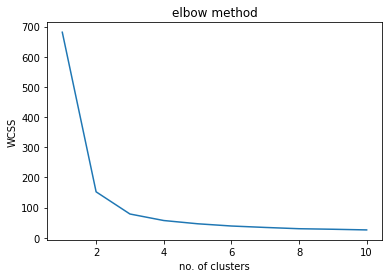

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('elbow method')
plt.xlabel('no. of clusters')
plt.ylabel('WCSS')
plt.show()

It is called 'elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

### So the number of clusters is ***3***.

# **Creating the kmeans classifier**

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=1)
y_kmeans = kmeans.fit_predict(x)

#### Visualising the clusters -> On the first 2 columns

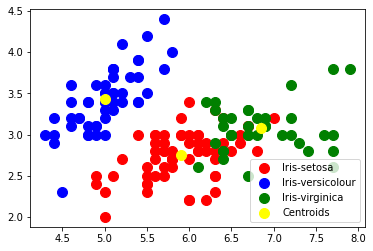

In [ ]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='red', label='Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='blue', label='Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c='green', label='Iris-virginica')

# Plotting the Centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=100, c='yellow', label='Centroids')
plt.legend()